In [ ]:
# Based on the datacamp course : https://www.datacamp.com/tutorial/decision-tree-classification-python
# Modified by Mehdi Ammi, Univ. Paris 8

# Scikit-Learn: Decision Tree (DT)

## Introduction to Decision Tree

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

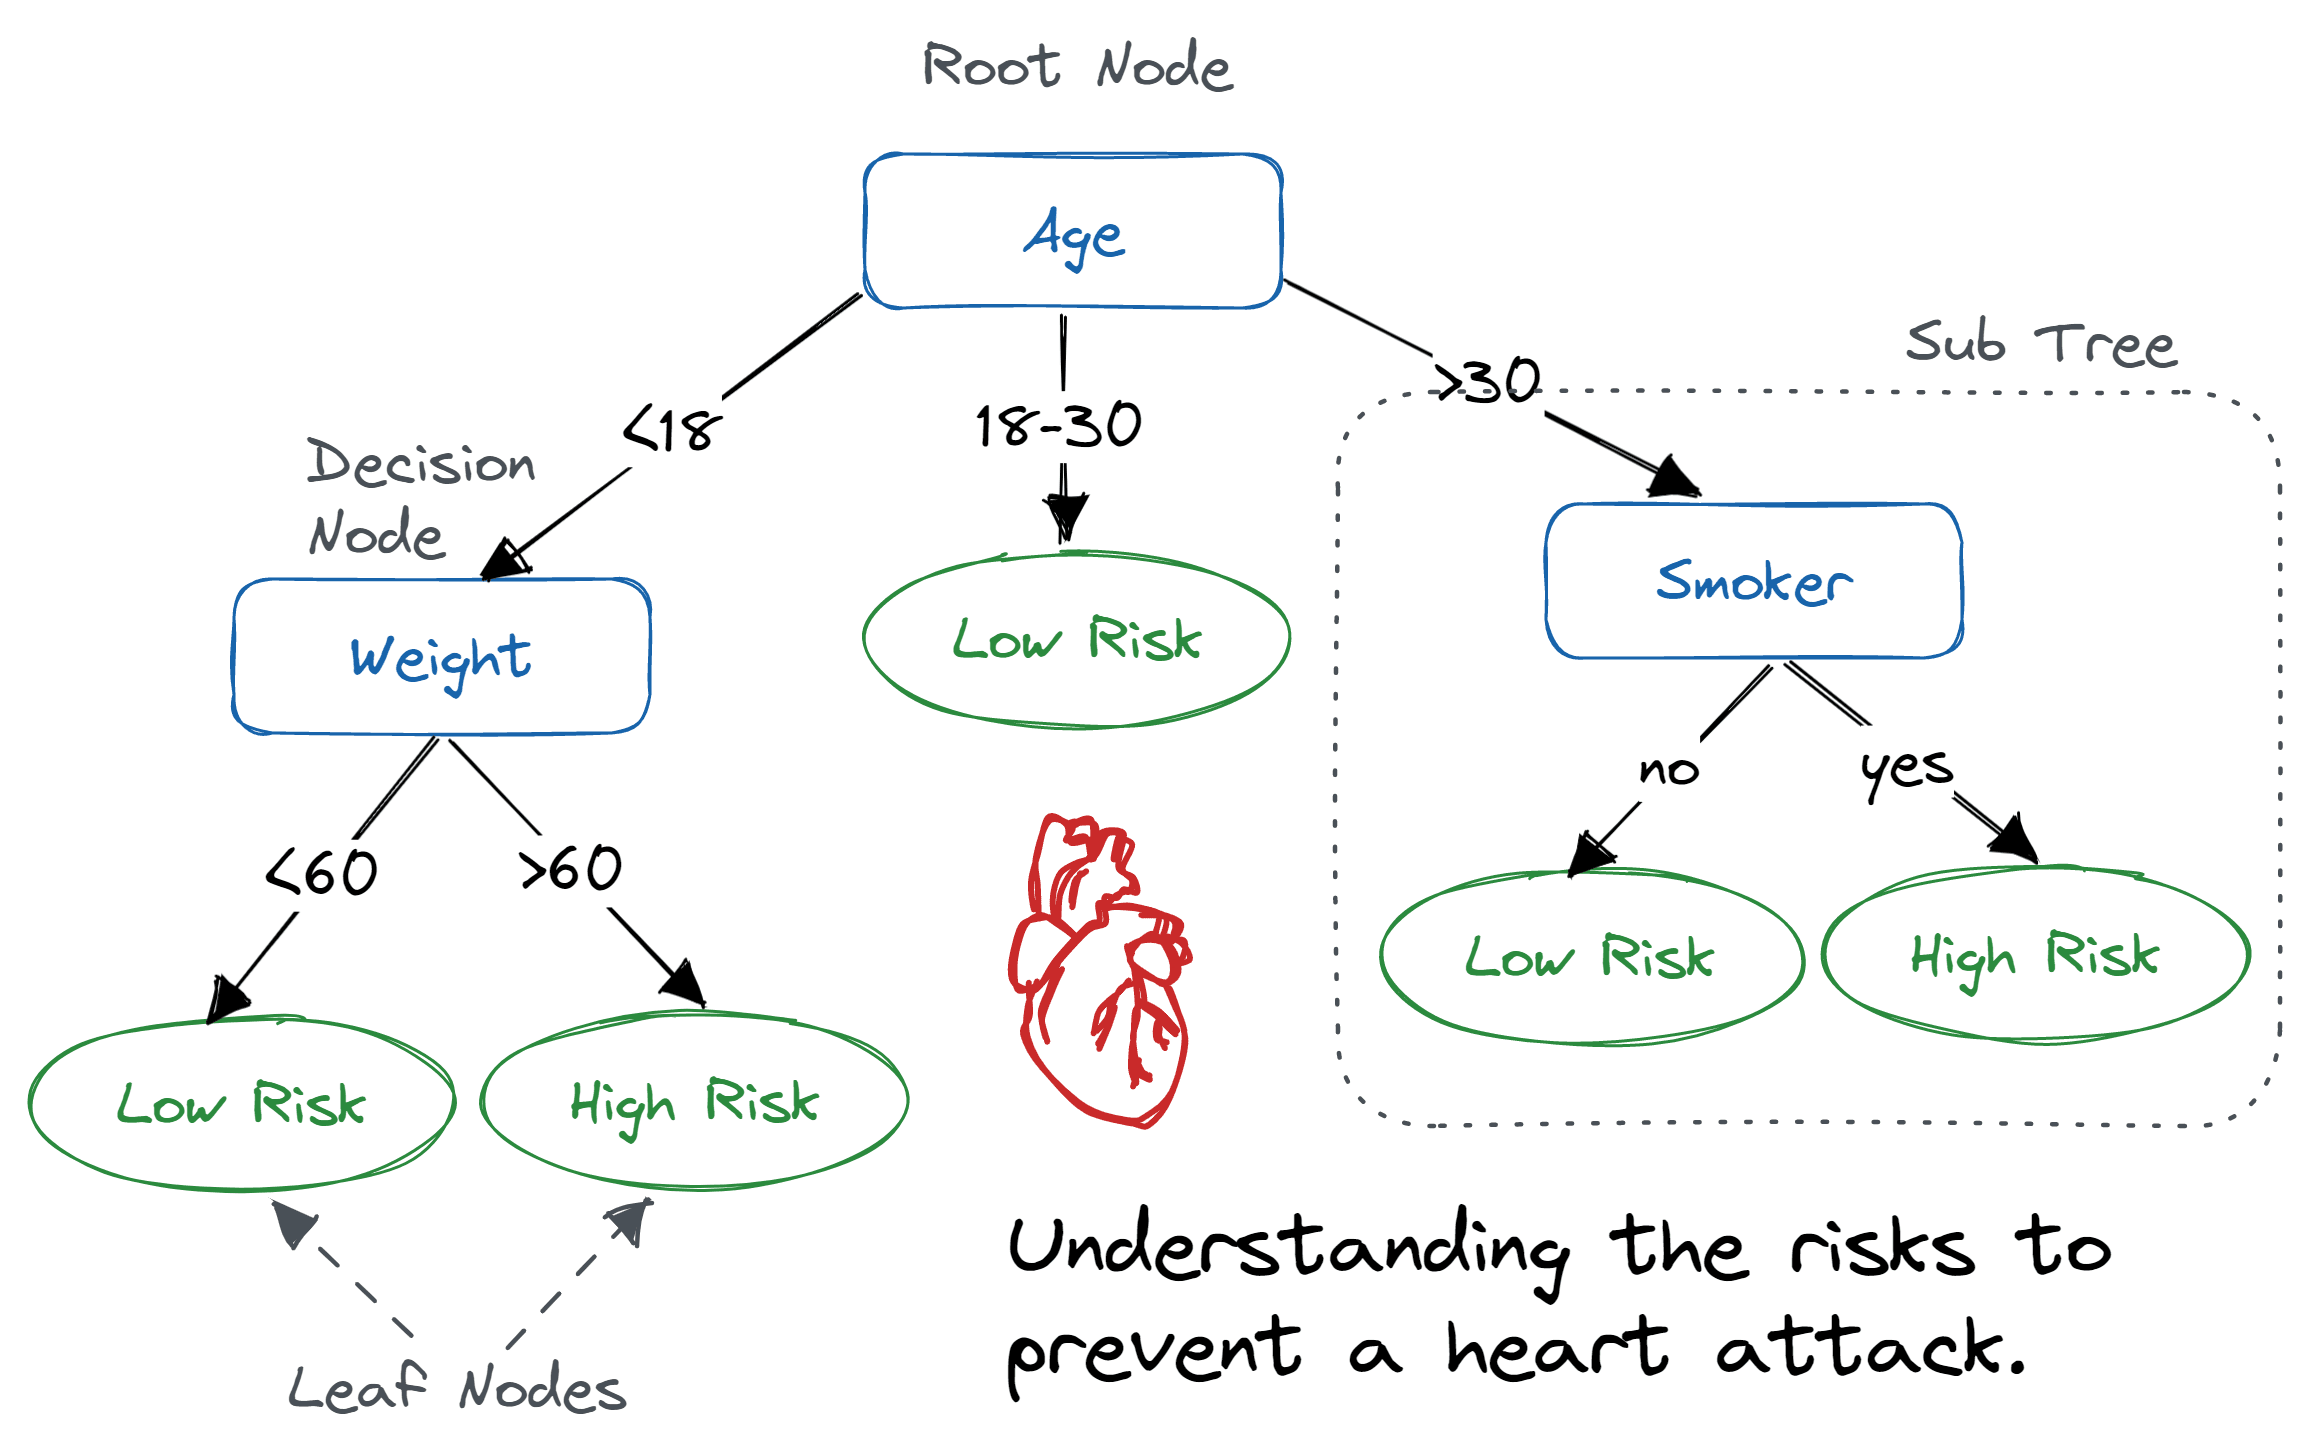

A decision tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm.

The time complexity of decision trees is a function of the number of records and attributes in the given data. The decision tree is a distribution-free or non-parametric method which does not depend upon probability distribution assumptions. Decision trees can handle high-dimensional data with good accuracy.

## How Does the Decision Tree Algorithm Work?

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures (ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the conditions will match:
 - All the tuples belong to the same attribute value.
 - There are no more remaining attributes.
 - There are no more instances.
 
 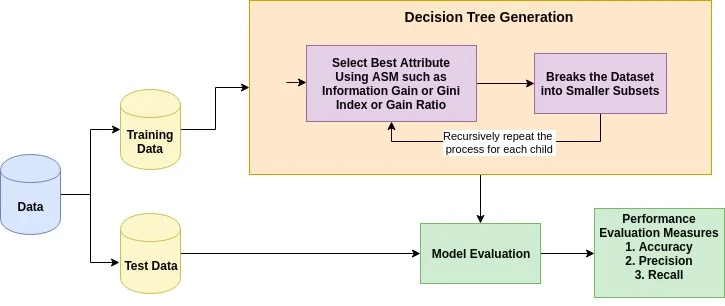

## Attribute Selection Measures
Attribute selection measure is a heuristic for selecting the splitting criterion that partitions data in the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature (or attribute) by explaining the given dataset. The best score attribute will be selected as a splitting attribute. In the case of a continuous-valued attribute, split points for branches also need to define. The most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

### Information Gain

Claude Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy is referred to as the randomness or the impurity in a system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before the split and average entropy after the split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

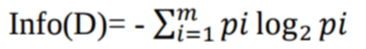

Where Pi is the probability that an arbitrary tuple in D belongs to class Ci.

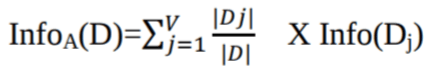

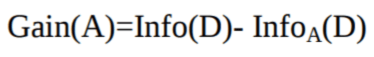

Where:
 - Info(D) is the average amount of information needed to identify the class label of a tuple in D.
 - |Dj|/|D| acts as the weight of the jth partition.
 - InfoA(D) is the expected information required to classify a tuple from D based on the partitioning by A.
 
 The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().

### Gain Ratio

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier, such as customer_ID, that has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

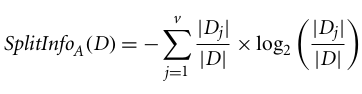

Where:
 - |Dj|/|D| acts as the weight of the jth partition.
 - v is the number of discrete values in attribute A.

The gain ratio can be defined as

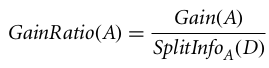

The attribute with the highest gain ratio is chosen as the splitting attribute (Source).

### Gini index

Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

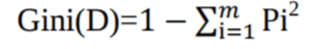

Where pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

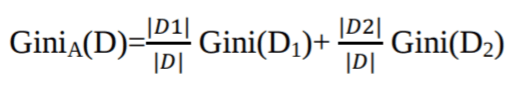

In the case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split point, and a point with a smaller gini index is chosen as the splitting point.

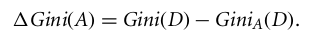

The attribute with the minimum Gini index is chosen as the splitting attribute.

#### Advantages of Decision Trees
- **Simplicity and Interpretability**: Decision trees are easy to understand and visualize. Even individuals without a background in data science can interpret the decision rules generated by a tree.
- **Flexibility**: Decision trees can handle both categorical and numerical data and do not require scaling of data.
- **Handling Missing Data**: Decision trees can manage missing values implicitly by imputing them during the splitting process.

#### Disadvantages of Decision Trees
- **Overfitting**: Decision trees can easily overfit the training data, especially if the tree becomes very complex.
- **Data Sensitivity**: Small variations in the data can result in completely different trees. Techniques like bagging and random forests can mitigate this issue.

## Importing Required Libraries

Let's first load the required libraries.

In [ ]:
# Installs the 'six' library, which provides utilities for writing code that is compatible with both Python 2 and Python 3.
!pip install six

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import files module from google.colab for file uploading
from google.colab import files

## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

In [ ]:
# Prompt user to upload files and store the uploaded files in a variable
uploaded = files.upload()

# Define column names for the dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

# Remove the first line !
#pima = pima.drop(0) 

pima.head()

|index|pregnant|glucose|bp|skin|insulin|bmi|pedigree|age|label|
|---|---|---|---|---|---|---|---|---|---|
|1|6|148|72|35|0|33\.6|0\.627|50|1|
|2|1|85|66|29|0|26\.6|0\.351|31|0|
|3|8|183|64|0|0|23\.3|0\.672|32|1|
|4|1|89|66|23|94|28\.1|0\.167|21|0|
|5|0|137|40|35|168|43\.1|2\.288|33|1|

## Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model

Let's create a decision tree model using Scikit-learn.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
>>
Accuracy: 0.6926406926406926

We got a classification rate of 67.53%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

## Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupy

In [ ]:
# Import necessary libraries and functions
from sklearn.tree import export_graphviz  # Function to export a decision tree in DOT format
from six import StringIO  # To handle string input/output
from IPython.display import Image  # To display images in IPython notebooks
import pydotplus  # To handle DOT files and create graph images

# Create a StringIO object to hold the DOT data
dot_data = StringIO()

# Export the decision tree (clf) to DOT format and write it to the StringIO object
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,  # Fill nodes with colors and round their corners
                special_characters=True,  # Use special characters in the labels
                feature_names=feature_cols,  # Use feature column names in the labels
                class_names=['0', '1'])  # Class names for the target variable

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Write the graph to a PNG file
graph.write_png('diabetes.png')

# Display the graph as a PNG image in the notebook
Image(graph.create_png())

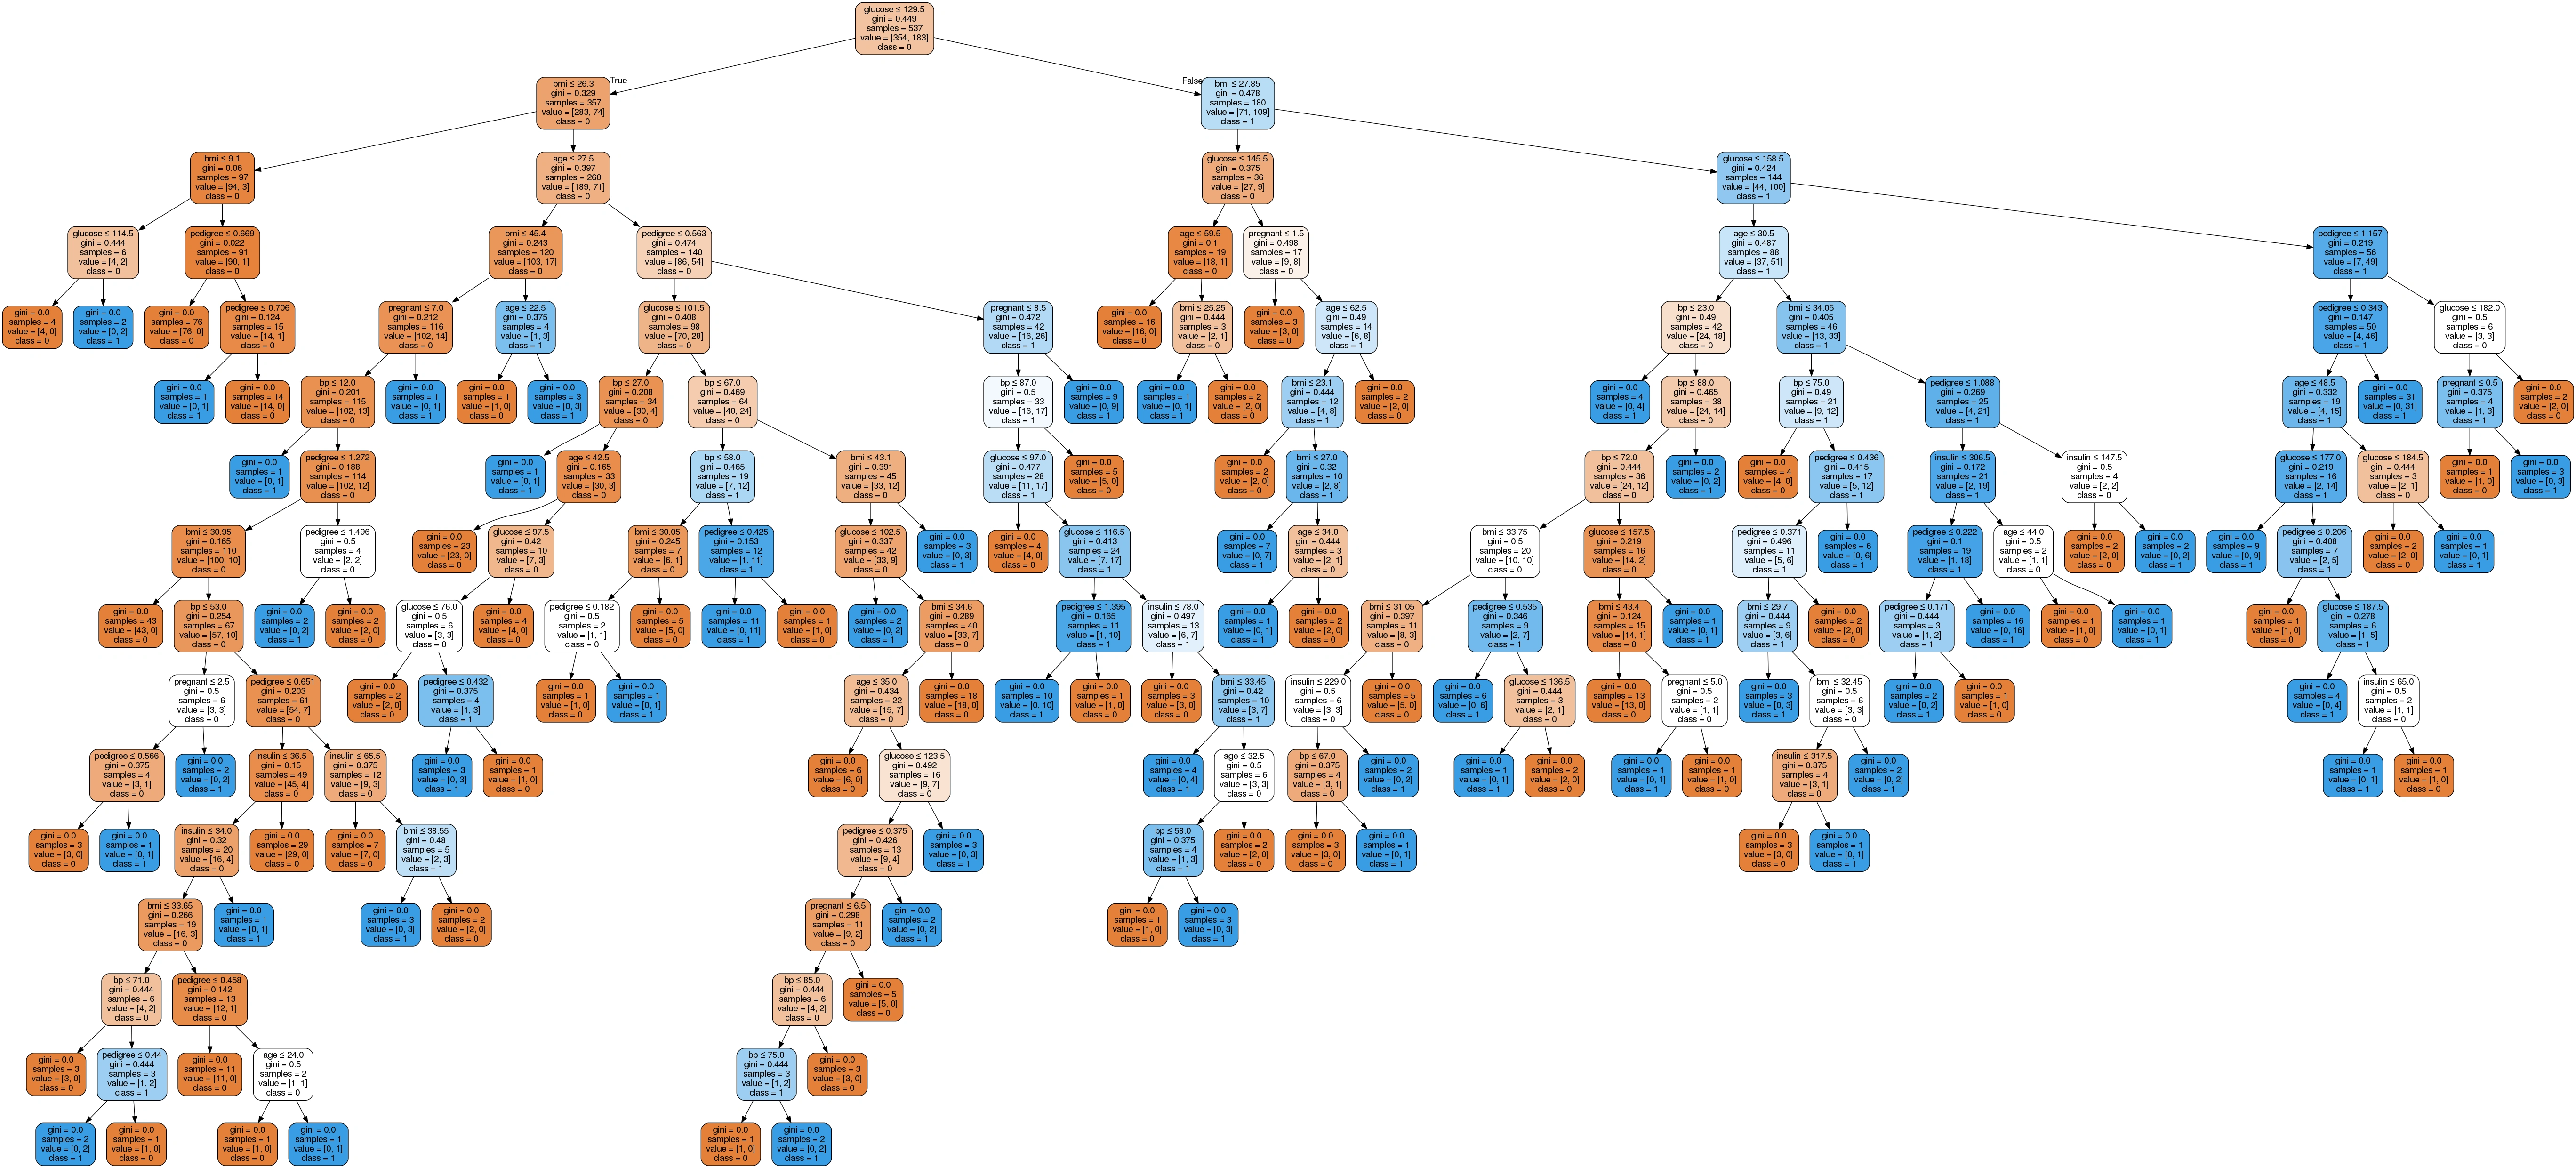

In the decision tree chart, each internal node has a decision rule that splits the data. Gini, referred to as Gini ratio, measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## Optimizing Decision Tree Performance

 - criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

 - splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

 - max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
>>
Accuracy: 0.7705627705627706

Well, the classification rate increased to 77.05%, which is better accuracy than the previous model.

## Visualizing Decision Trees

Let's make our decision tree a little easier to understand

Here, we've completed the following steps: 

 - Imported the required libraries.
 - Created a StringIO object called dot_data to hold the text representation of the decision tree.
 - Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.
 - Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.
 - Written the generated graph to a PNG file named "diabetes.png".
 - Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.

In [ ]:
# Import necessary libraries and functions
from six import StringIO  # To handle string input/output
from IPython.display import Image  # To display images in IPython notebooks
from sklearn.tree import export_graphviz  # Function to export a decision tree in DOT format
import pydotplus  # To handle DOT files and create graph images

# Create a StringIO object to hold the DOT data
dot_data = StringIO()

# Export the decision tree (clf) to DOT format and write it to the StringIO object
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,  # Fill nodes with colors and round their corners
                special_characters=True,  # Use special characters in the labels
                feature_names=feature_cols,  # Use feature column names in the labels
                class_names=['0', '1'])  # Class names for the target variable

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Write the graph to a PNG file
graph.write_png('diabetes.png')

# Display the graph as a PNG image in the notebook
Image(graph.create_png())

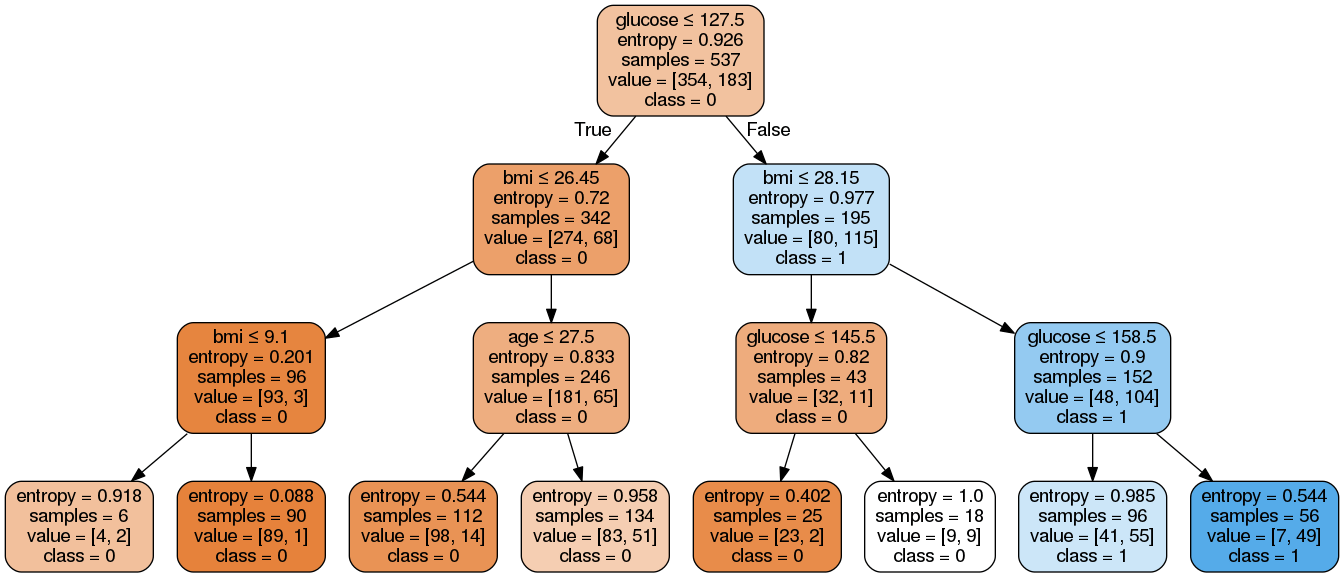

As you can see, this pruned model is less complex, more explainable, and easier to understand than the previous decision tree model plot.

## Exercices

### Exercice 1 : Feature Selection and Data Splitting
 - Select different features for building the decision tree model (e.g., exclude 'insulin' and 'skin' and include 'pregnant', 'glucose', 'bp', 'bmi', 'pedigree', and 'age').
 - Split the dataset into training and testing sets with a different test size of 20%.

### Exercice 2 : Building and Visualizing the Decision Tree
 - Build a decision tree using the 'entropy' criterion and set the maximum depth to 4.
 - Visualize the decision tree using the export_graphviz function and display the resulting image.

### Exercice 3 : Optimizing and Evaluating the Model
 - Create a decision tree classifier with the 'gini' criterion and a maximum depth of 5.
 - Evaluate the model accuracy and compare it with the previous models.

### Exercice 4 : Adjusting the Splitter Parameter
 - Create a decision tree classifier with the 'best' splitter and a maximum depth of 3.
 - Create another decision tree classifier with the 'random' splitter and a maximum depth of 3. Compare the accuracy of both models.

### Exercice 5 : Exploring the Effect of max_features Parameter
 - Create a decision tree classifier with max_features set to 'auto' and max depth of 4.
 - Create another decision tree classifier with max_features set to 3 and max depth of 4. Compare the accuracy of both models.

### Exercice 6 : Evaluating Model Performance with Cross-Validation
 - Use cross-validation to evaluate the performance of the decision tree model with 'gini' criterion and max depth of 4.
 - Compare the cross-validation accuracy with the test accuracy.

### Exercice 7 : Using Class Weights to Handle Imbalanced Data
 - Create a decision tree classifier with class_weight set to 'balanced' and max depth of 4.
 - Evaluate the model accuracy and compare it with the model without class weighting.

### Exercice 8 : Using Different Criteria
 - Create a decision tree classifier with the 'entropy' criterion and no limit on the depth.
 - Evaluate the model accuracy and compare it with a model using the 'gini' criterion with no limit on the depth.

### Exercice 9 : Feature Importance
 - Train a decision tree classifier with the default parameters.
 - Extract and display the feature importances. Which features are the most important for the classification?

### Exercice 10 : Visualizing Different Depth Trees
 - Create and visualize a decision tree with a maximum depth of 2.
 - Create and visualize a decision tree with a maximum depth of 5. Compare the complexity of the trees.

### Exercice 11 : Handling Missing Values
 - Impute missing values in the dataset using the mean of each feature.
 - Train and evaluate a decision tree classifier on the dataset with imputed values. Compare the accuracy with the original dataset.

### Exercice 12 : Decision Tree Classification on the "Iris" Dataset
Perform Decision Tree classification on the Iris dataset to classify the type of iris flower. Experiment with different tree parameters to optimize the model's performance.

Instructions:
- Load the Iris Dataset: Use the `load_iris()` function from `sklearn.datasets` to load the Iris dataset.
- Experiment with Different Criteria: Modify the code to use 'entropy' and 'gini' criteria. Observe the changes in accuracy.
- Tune the Max Depth Parameter: Experiment with different values of the max depth parameter (e.g., max_depth=2, max_depth=4, max_depth=6). Observe how it affects the model's performance.
- Visualize the Decision Tree: Visualize the decision tree using the `export_graphviz` function and display the resulting image.

### Exercice 13 : Decision Tree Classification on the "Breast Cancer" Dataset
Perform Decision Tree classification on the Breast Cancer dataset to classify whether a tumor is malignant or benign. Experiment with different tree parameters to optimize the model's performance.

Instructions:
- Load the Breast Cancer Dataset: Use the `load_breast_cancer()` function from `sklearn.datasets` to load the Breast Cancer dataset.
- Experiment with Different Criteria: Modify the code to use 'entropy' and 'gini' criteria. Observe the changes in accuracy.
- Tune the Min Samples Split Parameter: Experiment with different values of the min_samples_split parameter (e.g., min_samples_split=2, min_samples_split=10, min_samples_split=20). Observe how it affects the model's performance.
- Visualize the Decision Tree: Visualize the decision tree using the `export_graphviz` function and display the resulting image.

### Exercice 14 : Decision Tree Classification on the "Digits" Dataset
Perform Decision Tree classification on the Digits dataset to classify the handwritten digits. Experiment with different tree parameters to optimize the model's performance.

Instructions:
- Load the Digits Dataset: Use the `load_digits()` function from `sklearn.datasets` to load the Digits dataset.
- Experiment with Different Criteria: Modify the code to use 'entropy' and 'gini' criteria. Observe the changes in accuracy.
- Tune the Max Leaf Nodes Parameter: Experiment with different values of the max_leaf_nodes parameter (e.g., max_leaf_nodes=10, max_leaf_nodes=20, max_leaf_nodes=30). Observe how it affects the model's performance.
- Visualize the Decision Tree: Visualize the decision tree using the `export_graphviz` function and display the resulting image.

### Exercice 15 : Decision Tree Classification on the "Titanic" Dataset
Perform Decision Tree classification on the Titanic dataset to predict passenger survival. Experiment with different tree parameters to optimize the model's performance.

Instructions:
- Load the Titanic Dataset: Use the `sns.load_dataset('titanic')` function from the seaborn library to load the Titanic dataset.
- Preprocess the Data: Handle missing values and encode categorical variables.
- Experiment with Different Criteria: Modify the code to use 'entropy' and 'gini' criteria. Observe the changes in accuracy.
- Tune the Max Depth Parameter: Experiment with different values of the max depth parameter (e.g., max_depth=2, max_depth=4, max_depth=6). Observe how it affects the model's performance.
- Visualize the Decision Tree: Visualize the decision tree using the `export_graphviz` function and display the resulting image.